# Implement in python SVM/Softmax classifier for CIFAR-10 dataset

## Imports

In [38]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## Utils

In [ ]:
def plot_img(img, title=None, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title, fontsize=20)
    plt.axis('off')

## Load Dataset

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [7]:
class_names = ["Aeroplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

## Normalize the image data

In [21]:
X_train = X_train / 225.0
X_test = X_test / 225.0

In [29]:
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

## Visualize data

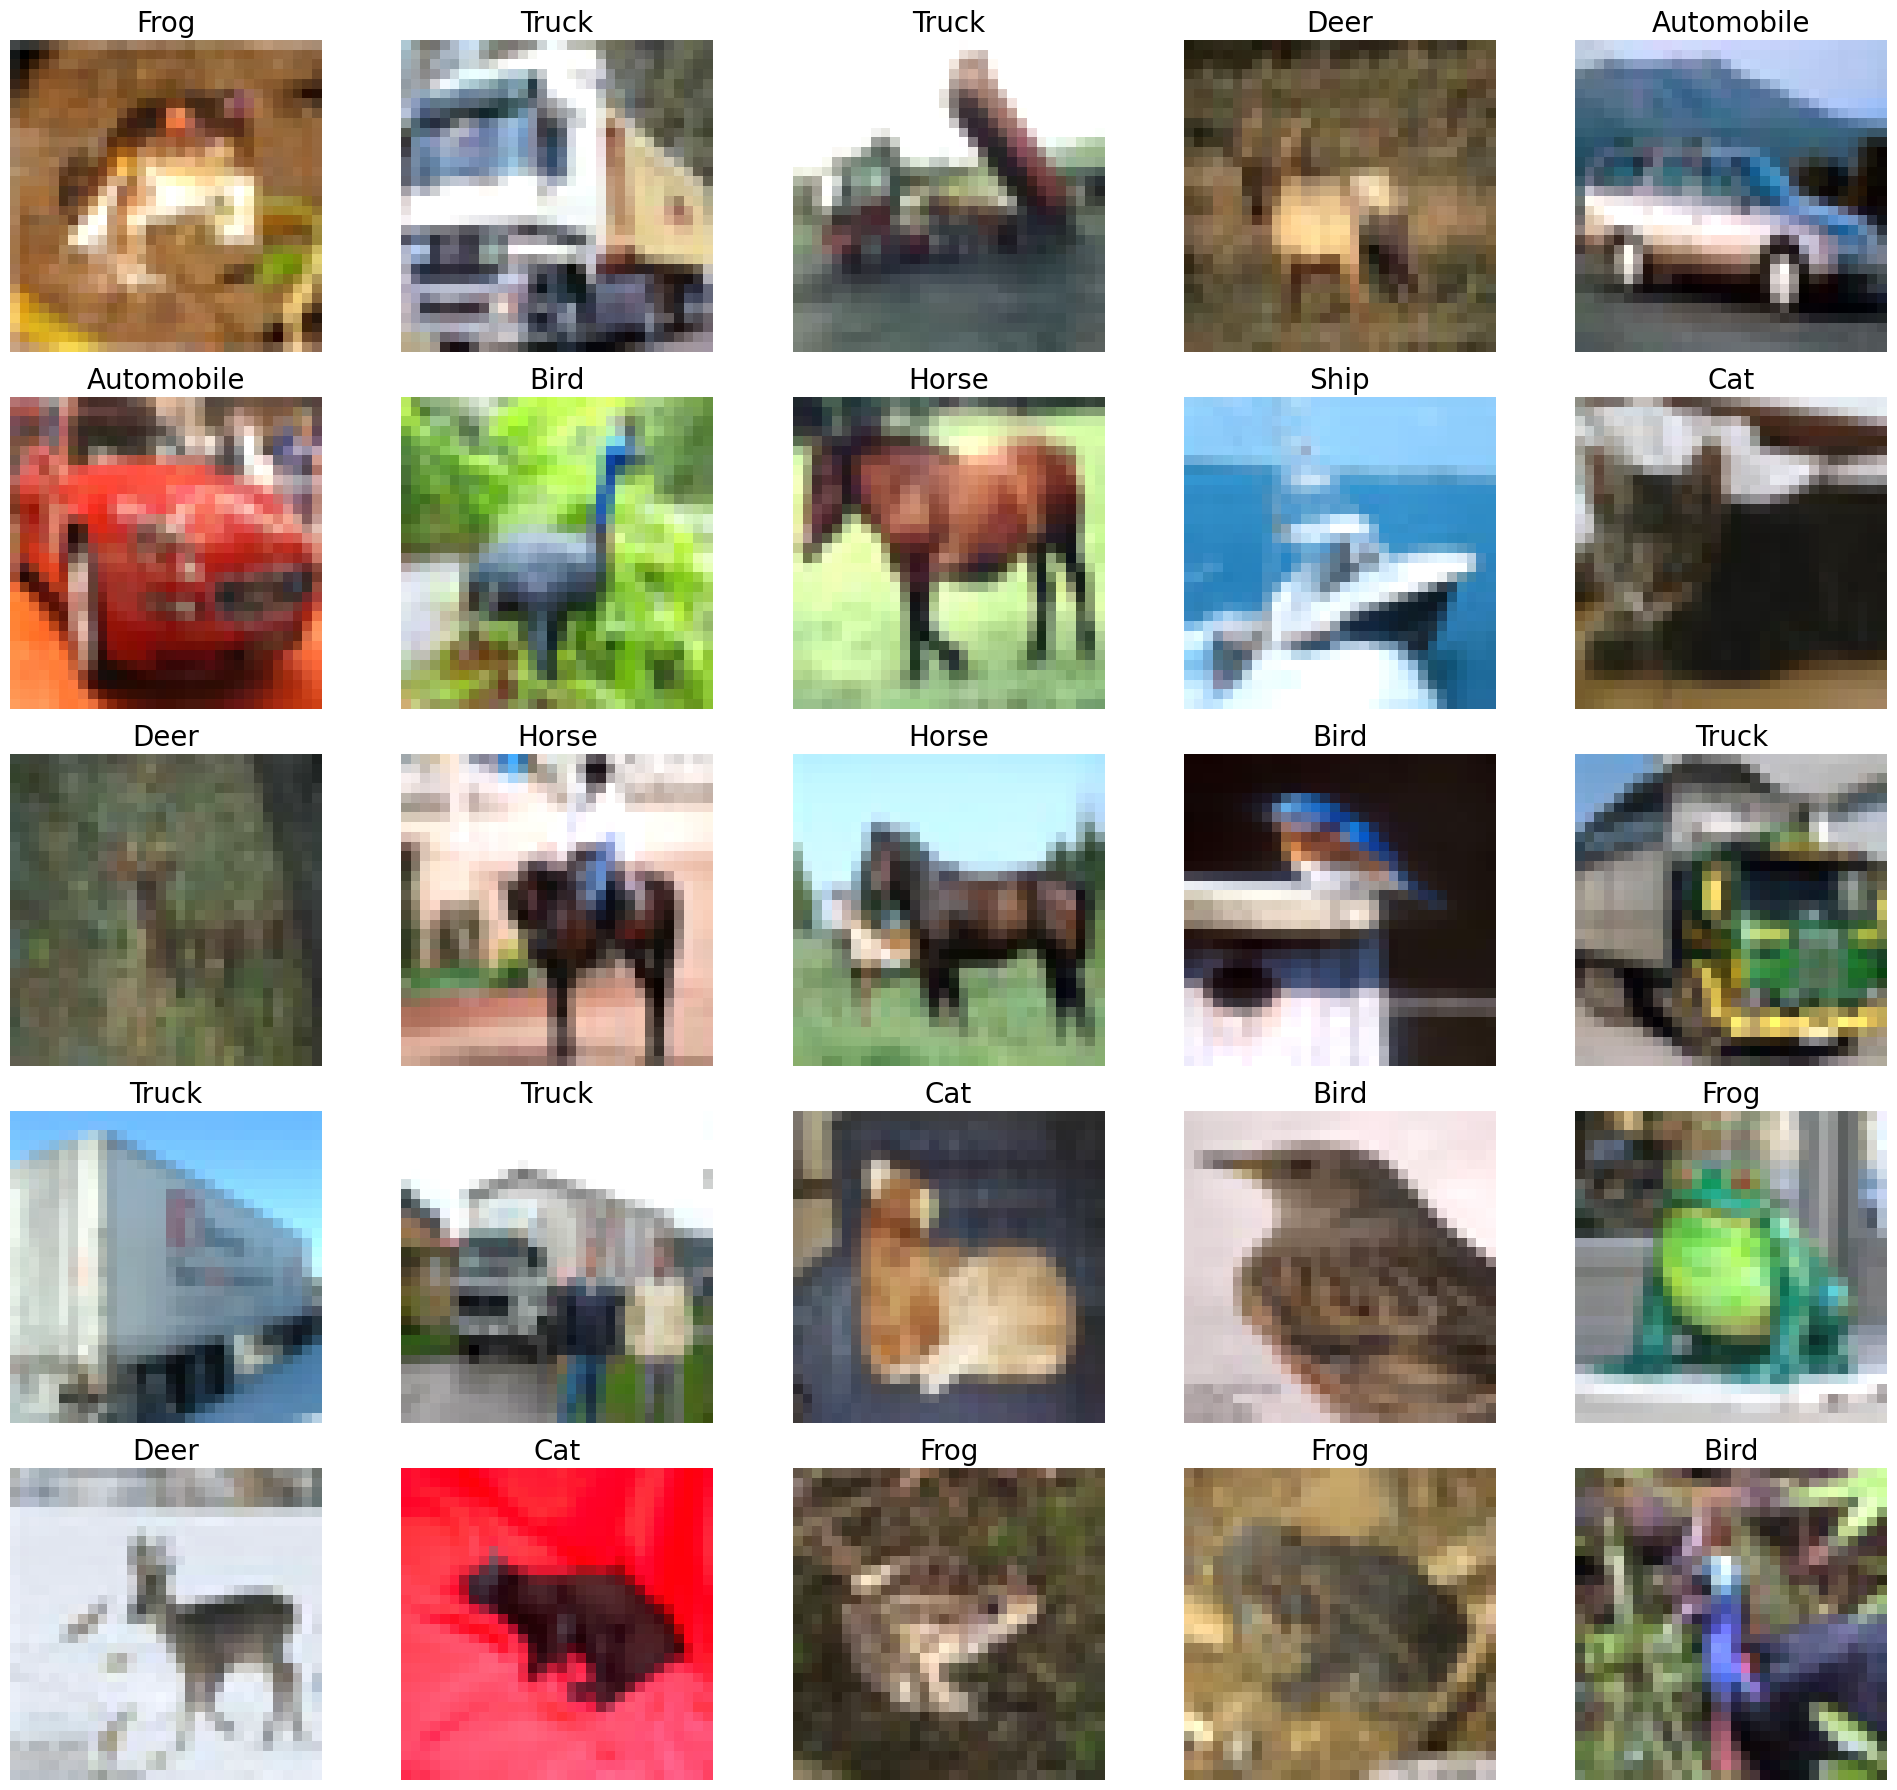

In [23]:
sample = X_train[:25]

plt.figure(figsize=(20,18))
for _ in range(25):
    plt.subplot(5, 5, _+1)
    plot_img(sample[_], title=f"{class_names[y_train[_][0]]}")
plt.tight_layout()

## Model

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [46]:
train_results = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7786 - accuracy: 0.3959 - val_loss: 1.9136 - val_accuracy: 0.3557
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7925 - accuracy: 0.3961 - val_loss: 1.8699 - val_accuracy: 0.3665
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7802 - accuracy: 0.3974 - val_loss: 1.8794 - val_accuracy: 0.3672
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7848 - accuracy: 0.3969 - val_loss: 1.8218 - val_accuracy: 0.3785
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7792 - accuracy: 0.3956 - val_loss: 1.8046 - val_accuracy: 0.3725
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7768 - accuracy: 0.3985 - val_loss: 2.0824 - val_accuracy: 0.3285
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7754 - accuracy: 0.3949 - val_loss: 1.9949 - val_accuracy:

In [44]:
eval_loss, eval_acc = model.evaluate(X_test, y_test)
print("Eval Acc:", eval_acc)
print("Eval Loss:", eval_loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.8865 - accuracy: 0.3647
Eval Acc: 0.36469998955726624
Eval Loss: 1.8865240812301636


## Make predictions

In [39]:
def predict(img):
    img = np.expand_dims(img, axis=0) # or tf.expand_dims(img, axis=0)
    scores = model.predict(img)
    pred = scores.argmax()
    return pred

1/1 [==============================] - 0s 30ms/step


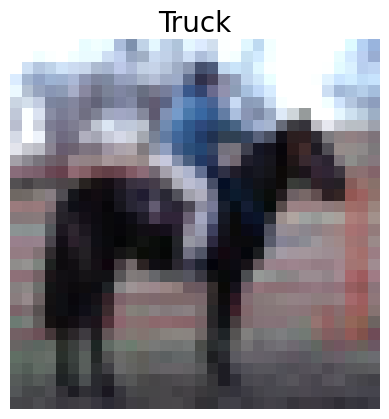

In [47]:
sample = X_test[523]
plot_img(sample, title=f"{class_names[predict(sample)]}")